# 等值线

本节介绍如何使用 cedarkit-maps 绘制 500hPa 位势高度等值线图。

首先导入需要使用的包。包括：

- 数据结构：numpy, pandas
- cedarkit 工具套件
    - 数据准备：reki
        - 数据查找函数： `find_local_file`
        - GRIB2文件要素加载函数：`load_field_from_file`
    - 气象可视化：cedarkit.maps
        - 绘图板：`Panel`
        - 底图布局：`EastAsiaMapTemplate`
        - 绘图样式：`ContourStyle`, `ContourLabelStyle`

In [1]:
import numpy as np
import pandas as pd

from reki.data_finder import find_local_file
from reki.format.grib.eccodes import load_field_from_file

from cedarkit.maps.style import ContourStyle, ContourLabelStyle
from cedarkit.maps.chart import Panel
from cedarkit.maps.domains import EastAsiaMapTemplate

设置绘图的数据参数，使用 CMA-GFS 2024 年 11 月 14 日 00 时次 024 时效数据。

In [2]:
system_name = "CMA-GFS"
data_type = "cma_gfs_gmf/grib2/orig"
start_time = pd.to_datetime("2024-11-14 00:00:00")
forecast_time = pd.to_timedelta("24h")

## 加载数据

获取 GRIB2 数据路径

In [3]:
file_path = find_local_file(
    data_type,
    start_time=start_time,
    forecast_time=forecast_time,
)
file_path

PosixPath('/g3/COMMONDATA/OPER/CEMC/GFS_GMF/Prod-grib/2024111400/ORIG/gmf.gra.2024111400024.grb2')

加载 500 hPa 位势高度场。位势高度在 ecCodes 的内置要素名为 `gh`

In [4]:
h_500_field = load_field_from_file(
    file_path,
    parameter="gh",
    level_type="pl",
    level=500
) / 10.0
h_500_field

<xarray.DataArray 'gh' (latitude: 1440, longitude: 2880)> Size: 33MB
array([[527.97007813, 527.97007813, 527.97007813, ..., 527.97007813,
        527.97007813, 527.97007813],
       [527.90007813, 527.90007813, 527.90007813, ..., 527.90007813,
        527.90007813, 527.90007813],
       [527.82007813, 527.82007813, 527.82007813, ..., 527.82007813,
        527.82007813, 527.82007813],
       ...,
       [484.42007813, 484.42007813, 484.42007813, ..., 484.42007813,
        484.42007813, 484.42007813],
       [484.41007813, 484.41007813, 484.41007813, ..., 484.41007813,
        484.41007813, 484.41007813],
       [484.39007813, 484.39007813, 484.39007813, ..., 484.39007813,
        484.39007813, 484.39007813]])
Coordinates:
    time        datetime64[ns] 8B 2024-11-14
    step        timedelta64[ns] 8B 1 days
    valid_time  datetime64[ns] 8B 2024-11-15
    pl          float64 8B 500.0
  * latitude    (latitude) float64 12kB 89.94 89.81 89.69 ... -89.81 -89.94
  * longitude   (longitude) float64 23kB 0.0 0.125 0.25 ... 359.6 359.8 359.9

## 配置

定义等值线层次

In [5]:
h_contour_lev = np.linspace(500, 588, endpoint=True, num=23)
h_contour_lev

array([500., 504., 508., 512., 516., 520., 524., 528., 532., 536., 540.,
       544., 548., 552., 556., 560., 564., 568., 572., 576., 580., 584.,
       588.])

定义等值线颜色

In [6]:
h_contour_colos = "blue"

定义线宽

In [7]:
h_linewidths = np.where(h_contour_lev == 588, 1.4, 0.7)

定义等值线样式 (`ContourStyle`)，包括等值线标签样式 (`ContourLabelStyle`)

In [8]:
hgt_style = ContourStyle(
    levels=h_contour_lev,
    colors="blue",
    linewidths=h_linewidths,
    label=True,
    label_style=ContourLabelStyle(
        colors="black",
        fontsize=8,
    )
)

## 绘制

创建中国区域底图布局

In [9]:
domain = EastAsiaMapTemplate()

绘制等值线，设置标题

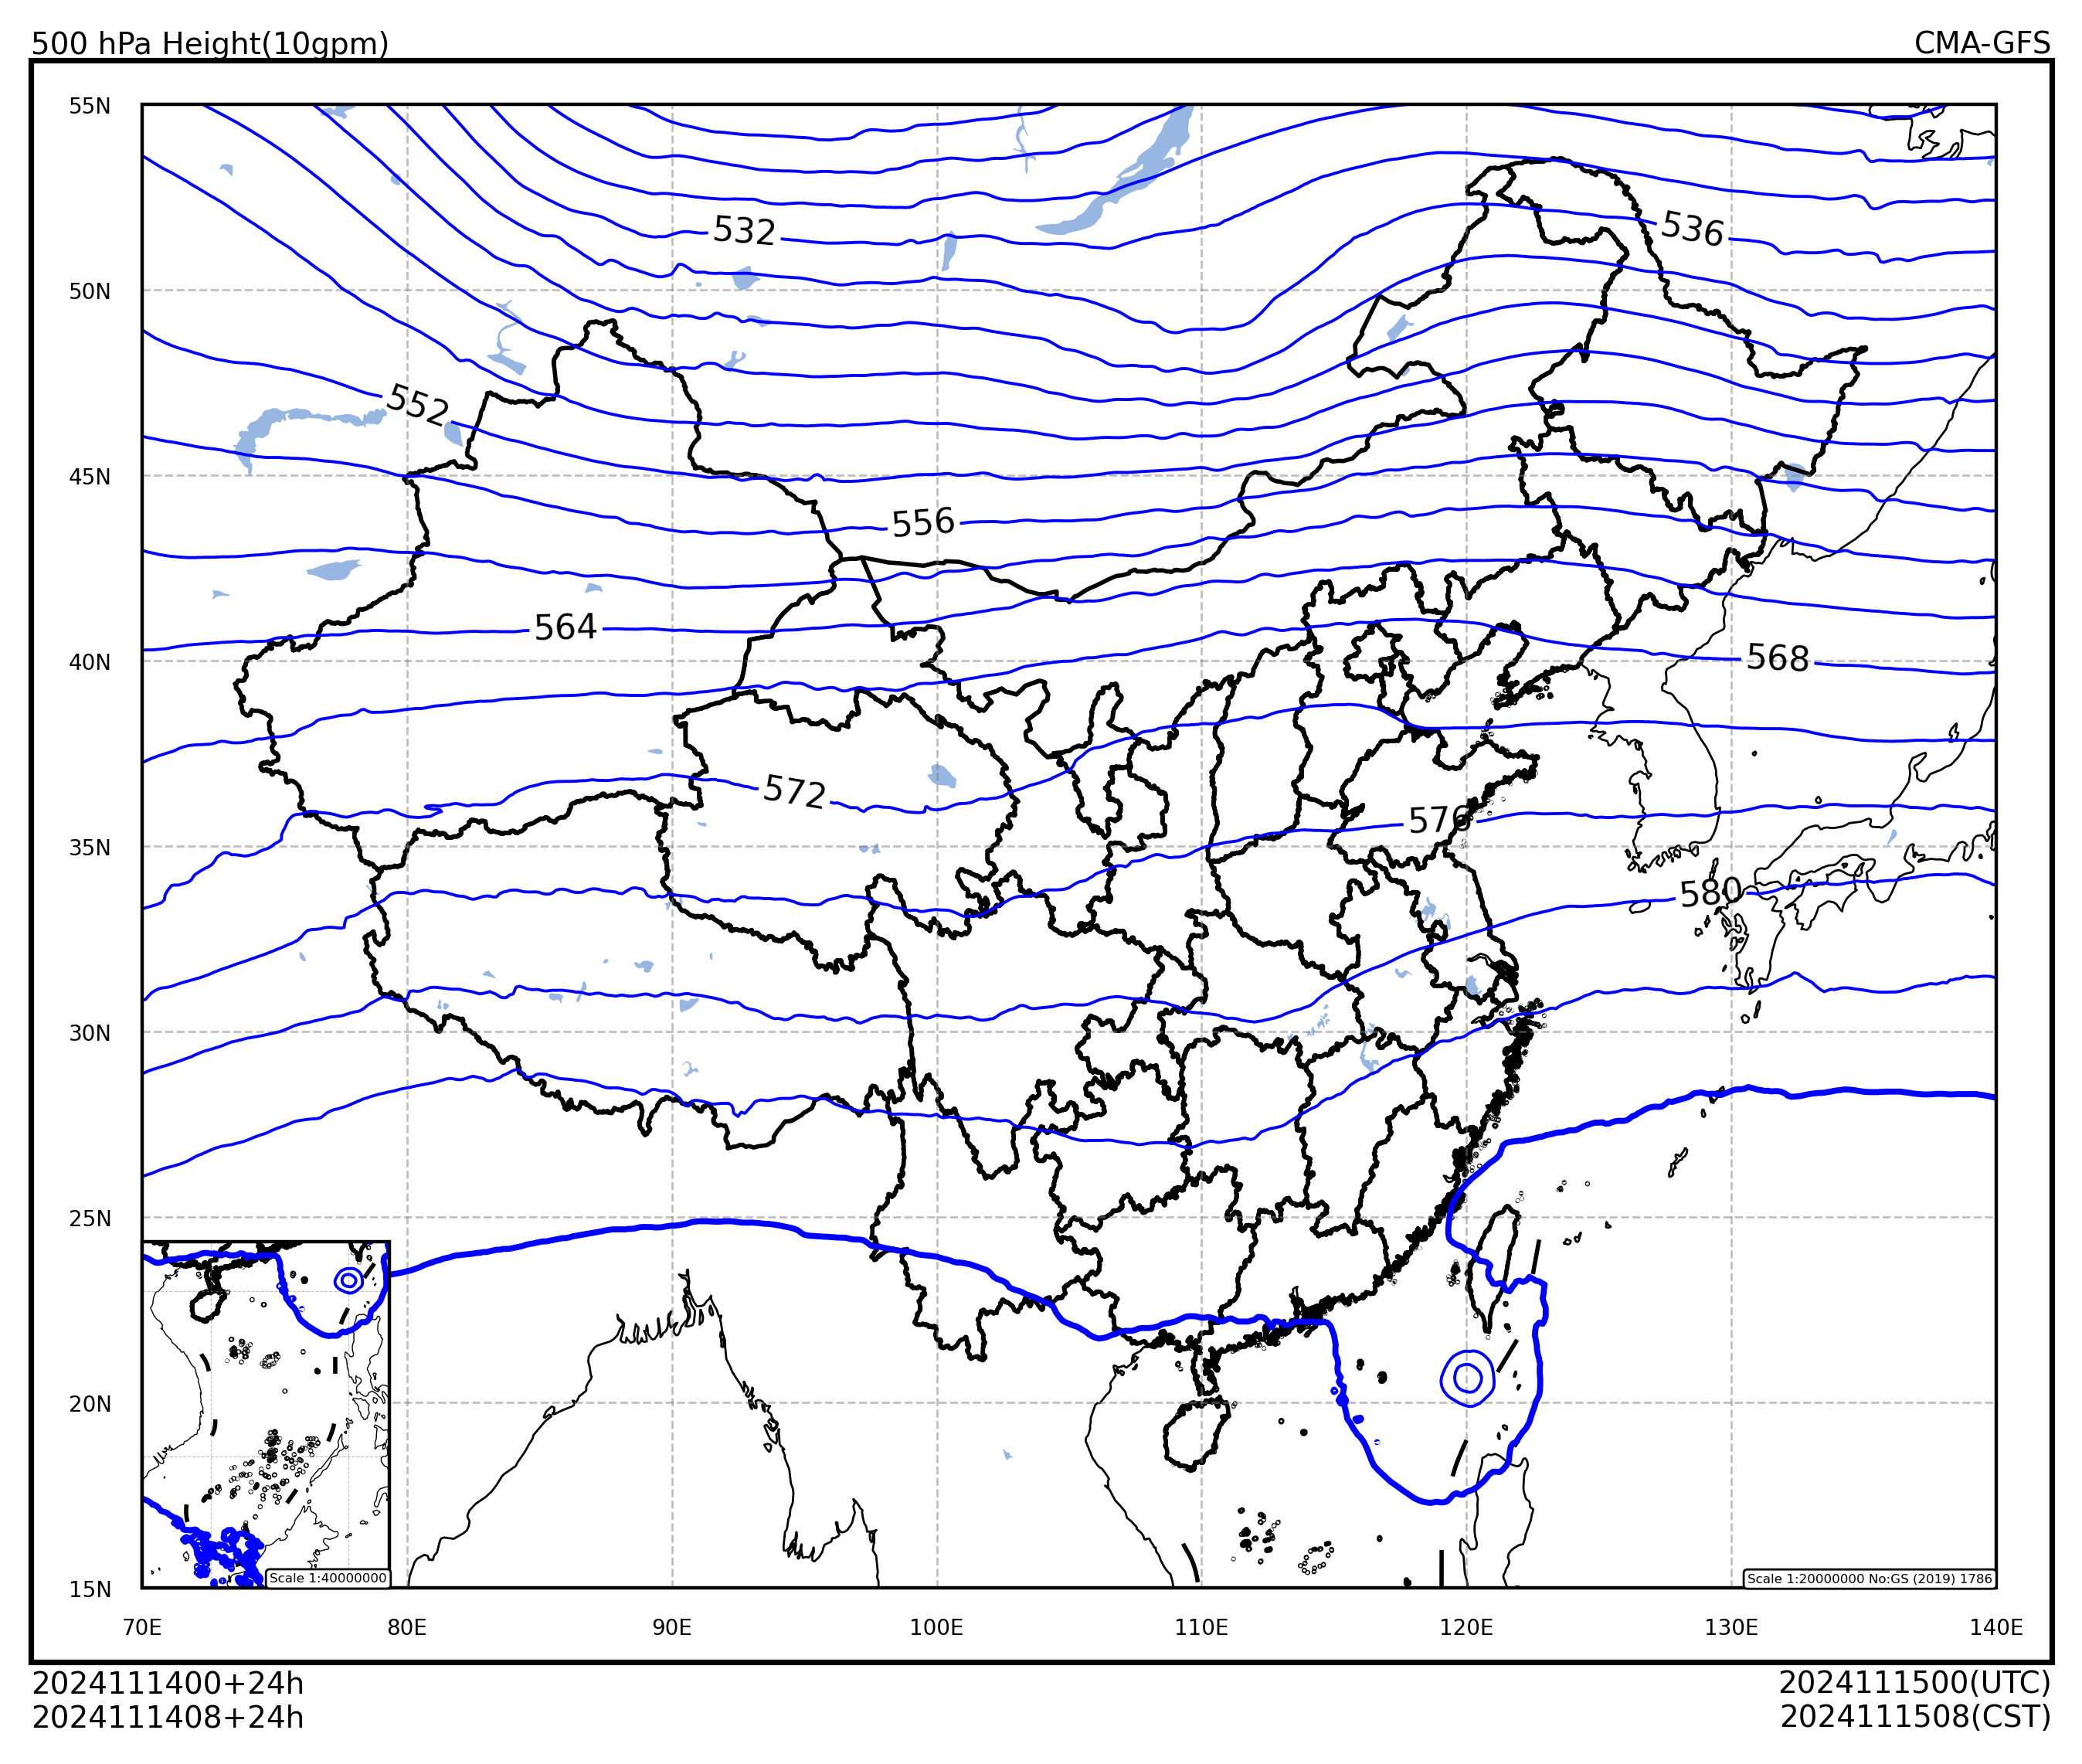

In [10]:
panel = Panel(domain=domain)
panel.plot(h_500_field, style=hgt_style)

domain.set_title(
    panel=panel,
    graph_name="500 hPa Height(10gpm)",
    system_name=system_name,
    start_time=start_time,
    forecast_time=forecast_time,
)
panel.show()